In [112]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [113]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/396008/hw_bootstrap.csv', sep=';',index_col = 'Unnamed: 0')

In [114]:
df.head()

value experimentVariant
1  10,3804953740268           Control
2  9,54686666784264           Control
3  11,0882146509904           Control
4  10,1472740570122           Control
5  9,78980767524929           Control

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   value              1000 non-null   object
 1   experimentVariant  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [116]:
df.experimentVariant.value_counts()

Treatment    500
Control      500
Name: experimentVariant, dtype: int64

In [117]:
df.value = df.value.str.replace(',','.').astype('float')

In [118]:
def get_bootstrap_mean(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

In [119]:
control = df.query('experimentVariant=="Control"').value
treatment = df.query('experimentVariant=="Treatment"').value

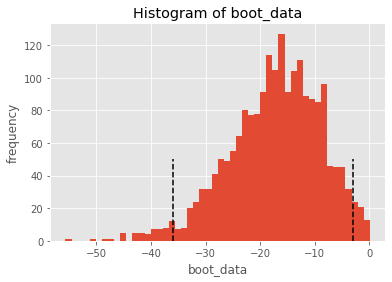

In [120]:
booted_data = get_bootstrap_mean(control,treatment , boot_it = 2000) 

In [121]:
booted_data["p_value"]

0.040524090259554384

In [122]:
booted_data["ci"]

0
0.025 -35.921006
0.975  -2.962015

In [123]:
mannwhitneyu(control,treatment)

MannwhitneyuResult(statistic=124189.5, pvalue=0.42960742912427896)

Принимая нулевую гипотезу, что две группы не отличаются друг от друга, мы применили бутстрап (с np.mean) и критерий mann-whitney. p-value бутстрапа < 0.05, это говорит о том, что при заданном уровне значимости нулевую гипотезу стоит отклонить. p-value критерия Манна-Уитни говорит же, что нулевую гипотезу отклонять не стоит. Веротятно, такие различия возникли из-за выбросов, которые имеются в данных, так как критерий Манна-Уитни устойчив к выбросам, что не скажешь о расчете среднего значения.

In [124]:
def get_bootstrap_median(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

In [125]:
booted_data = get_bootstrap_median(control,treatment , boot_it = 2000) 

In [126]:
booted_data["p_value"]

0.9037056431707807

In [127]:
booted_data["ci"]

0
0.025 -0.156239
0.975  0.131162

In [128]:
mannwhitneyu(control,treatment)

MannwhitneyuResult(statistic=124189.5, pvalue=0.42960742912427896)

Принимая нулевую гипотезу, что две группы не отличаются друг от друга, мы применили бутстрап (с np.median) и критерий mann-whitney. p-value бутстрапа, как и критерия Манна-Уитни > 0.05, это говорит о том, что при заданном уровне значимости нулевую гипотезу отклонять не стоит. Отличием этого кейса по сравнению с прошлым, является то, что в этом случае рассчитывается медиана, которая является устойчивой к выбросам.

На основе анализа примененных критериев, можно сделать вывод что две группы веротянее всего значимо не отличаются друг от друга, причем в одной группе имеются выбросы, которые необходимо учесть.
Необходимо заранее формулировать гипотезу и подбирать под нее релевантный статистический критерий в рамках дизайна эксперимента